# Customer Segmentation and Outlier Analysis

This project focuses on segmenting customers based on their purchasing behavior using clustering techniques.  
We analyze key customer metrics—**Recency, Frequency, and Monetary Value (RFM)**—to identify distinct groups and detect outliers.  
The goal is to understand customer patterns and develop targeted strategies for different segments.

## Importing Required Libraries
We use **pandas** for data manipulation, **matplotlib & seaborn** for visualization, and **scikit-learn** for clustering.  
Additional settings are applied to improve data readability.

In [172]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

# Data Exploration

In [4]:
df = pd.read_excel("./Data/online_retail.xlsx", sheet_name=0)

df.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


The **Description** and **Customer ID** columns have missing values

In [7]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


1. **Negative Values**: Negative values are observed in both **Quantity** and **Price** columns.
  
2. **Missing Values**: There are missing values in the **Customer ID** column.

**Describing Object-Type Columns**

In [9]:
df.describe(include= 'O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


Exploring the missing values in the **Customer ID** column to understand the extent of the missing data and decide how to handle it

In [12]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


Negative Quantity Values

In [18]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


**Understanding Invoice Numbers**: The **InvoiceNo** is a 6-digit numerical code uniquely assigned to each transaction. If the invoice number starts with the letter 'C', it indicates a cancellation of a previous transaction. 


In [218]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [22]:
df["Invoice"].replace("[0-9]", "", regex= True ).unique()

array(['', 'C', 'A'], dtype=object)

In [26]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


**Understanding StockCodes**: The **StockCode** is a 5-digit integral number uniquely assigned to each distinct product. It represents the product or item in the transaction.


In [28]:
df["StockCode"] = df["StockCode"].astype("str")
df[df["StockCode"].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [30]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [33]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")== False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [34]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [35]:
df[df["StockCode"].str.contains("^POST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.00,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.00,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.00,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.00,France


In [36]:
df[df["StockCode"].str.contains("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


In [47]:
df[df["StockCode"].str.contains("^DCGS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
466308,533348,DCGSSBOY,BOYS PARTY BAG,1,2010-11-17 09:23:00,3.36,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom
496962,535835,DCGSSBOY,BOYS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom
496963,535835,DCGSSGIRL,GIRLS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom


In [58]:
df[df["StockCode"].str.contains("^AMAZON")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom


**Understanding StockCode**: The **StockCode** is primarily meant to follow the pattern `[0-9]{5}` (5 digits). However, the dataset includes values that deviate from this pattern, such as `[0-9]{5}[a-zA-Z]+`. Below are some observations and classifications of various **StockCodes**:

- **DCGS**: Appears valid but contains negative quantities, and the customer ID is missing. **Exclude from clustering**.
- **D**: Represents discount values. **Exclude from clustering**.
- **DOT**: Likely represents postage charges. **Exclude from clustering**.
- **M or m**: Represents manual transactions. **Exclude from clustering**.
- **C2**: Carriage transaction (uncertain meaning). **Exclude from clustering**.
- **C3**: Appears valid but only has 1 transaction. **Exclude**.
- **BANK CHARGES or B**: Represents bank charges. **Exclude from clustering**.
- **S**: Samples sent to the customer. **Exclude from clustering**.
- **TESTXXX**: Represents testing data and is invalid. **Exclude from clustering**.
- **gift__XXX**: Purchases made with gift cards (no customer data). **Exclude**.
- **PADS**: Appears to be a legitimate stock code for padding. **Include**.
- **SP1002**: A special request item with few transactions, some having zero pricing. **Exclude for now**.
- **AMAZONFEE**: Appears to represent fees related to Amazon shipping. **Exclude for now**.
- **ADJUSTX**: Likely represents manual account adjustments by admins. **Exclude for now**.


In [63]:
df["Country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

## Data Cleaning

In [94]:
cleaned_df = df.copy()
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [219]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

/var/folders/r1/0b_sbly15f38jtv0x9y3gv2c0000gn/T/ipykernel_30890/34903165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")


### Dropping Unwanted Records

1. **Dropping Invoice Records Starting with 'C' and 'A'**:
   - The invoice records that start with the letters 'C' and 'A' represent cancellations or adjustments. These are dropped from the dataset.

2. **Dropping StockCode Records That Are Not Useful**:
   - Excluding **StockCode** records that are invalid or irrelevant for clustering, such as:
     - **'TESTXXX'**: Testing data.
     - **'BANK CHARGES'** or **'B'**: Bank charges.
     - **'S'**: Samples sent to the customer.
     - **'D'**: Discount values.
     - **Other invalid codes** like 'M', 'm', 'C2', etc.


In [220]:
mask = (cleaned_df["Invoice"].str.match("^\\d{6}$") == True)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [105]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515252 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      515252 non-null  object        
 1   StockCode    515252 non-null  object        
 2   Description  512324 non-null  object        
 3   Quantity     515252 non-null  int64         
 4   InvoiceDate  515252 non-null  datetime64[ns]
 5   Price        515252 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      515252 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.4+ MB


In [106]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (

    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True )
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [108]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512797.00,512797,512797.00,406337.00
mean,11.00,2010-06-28 18:26:53.830657792,3.39,15373.63
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,104.35,NaN,5.07,1677.37


### Data Issues After Cleaning

1. **Negative Values in Quantity**:
   - Although the **Price** column no longer has negative values (after data cleaning), the **Quantity** column still contains negative values. 

2. **Missing Values in CustomerID**:
   - The **CustomerID** column still contains missing values. 

In [111]:
cleaned_df.dropna(subset = ["Customer ID"], inplace=True)

/var/folders/r1/0b_sbly15f38jtv0x9y3gv2c0000gn/T/ipykernel_30890/2345040199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset = ["Customer ID"], inplace=True)


Dropped rows where the **CustomerID** was missing

In [112]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [115]:
len(cleaned_df[cleaned_df["Price"] == 0])

28

Found that there are **28 rows** where the **Price** is equal to 0

In [117]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [118]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [119]:
cleaned_df["Price"].min()

0.001


Calculating the proportion of data dropped during the cleaning process

In [120]:
len(cleaned_df)/len(df)

0.7732429238325965

We have retained 77% data and lost 23% data

### Feature Engineering: RFM Analysis

Performing **RFM Analysis** (Recency, Frequency, and Monetary) to better understand customer behavior. Here's how each feature is defined:

1. **Recency (R)**: Measures how recently a customer made a purchase. Customers who bought more recently are more likely to purchase again. Recency can be calculated as the number of days since the last purchase for each customer.

2. **Frequency (F)**: Measures how often a customer makes a purchase. Frequent buyers are more valuable to the business. Frequency can be calculated as the total number of purchases made by a customer.

3. **Monetary (M)**: Measures the total monetary value spent by a customer. This helps us identify high-spending customers. Monetary can be calculated as the total amount spent by each customer.





In [123]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df

/var/folders/r1/0b_sbly15f38jtv0x9y3gv2c0000gn/T/ipykernel_30890/3586075153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [130]:
aggregated_df = cleaned_df.groupby(by = "Customer ID", as_index = False) \
    .agg(

        MonetaryValue = ("SalesLineTotal", "sum"),
        Frequency = ("Invoice", "nunique"),
        LastInvoiceDate= ("InvoiceDate", "max")
    )

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [131]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [135]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

In [136]:
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17
4281,18284.00,411.68,1,2010-10-04 11:33:00,66
4282,18285.00,377.00,1,2010-02-17 10:24:00,295
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111


### Visualizing RFM Analysis Distributions

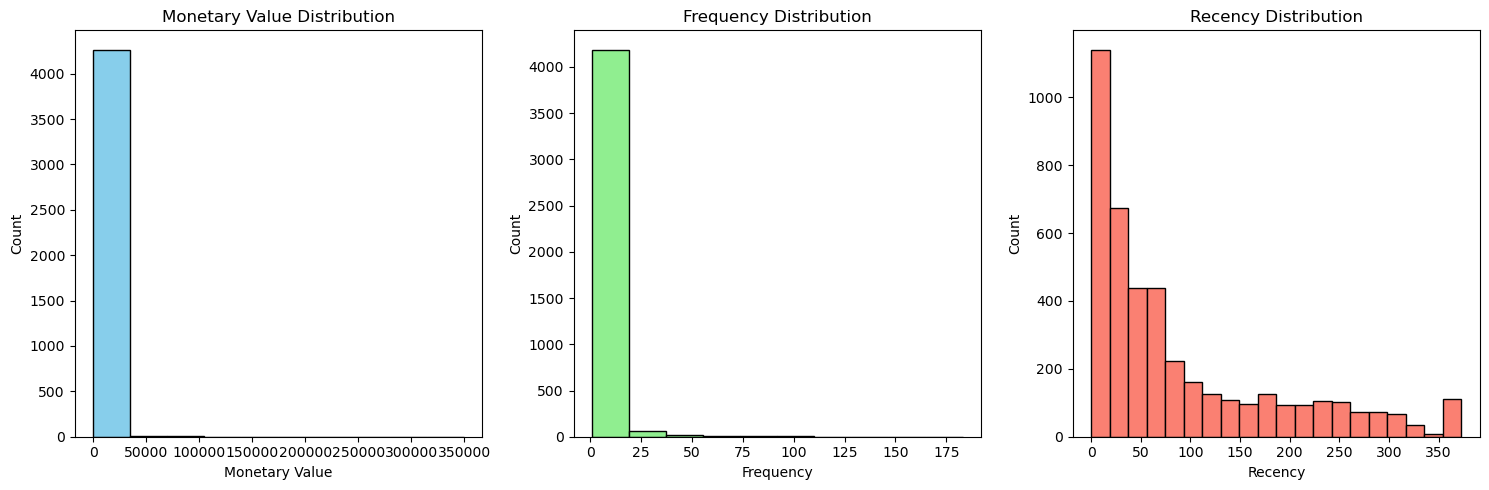

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df["MonetaryValue"], bins=10, color= 'skyblue', edgecolor= 'black')
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(aggregated_df["Frequency"], bins=10, color = "lightgreen", edgecolor= 'black')
plt.title('Frequency Distribution')
plt.xlabel("Frequency")
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df["Recency"], bins=20, color="salmon", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

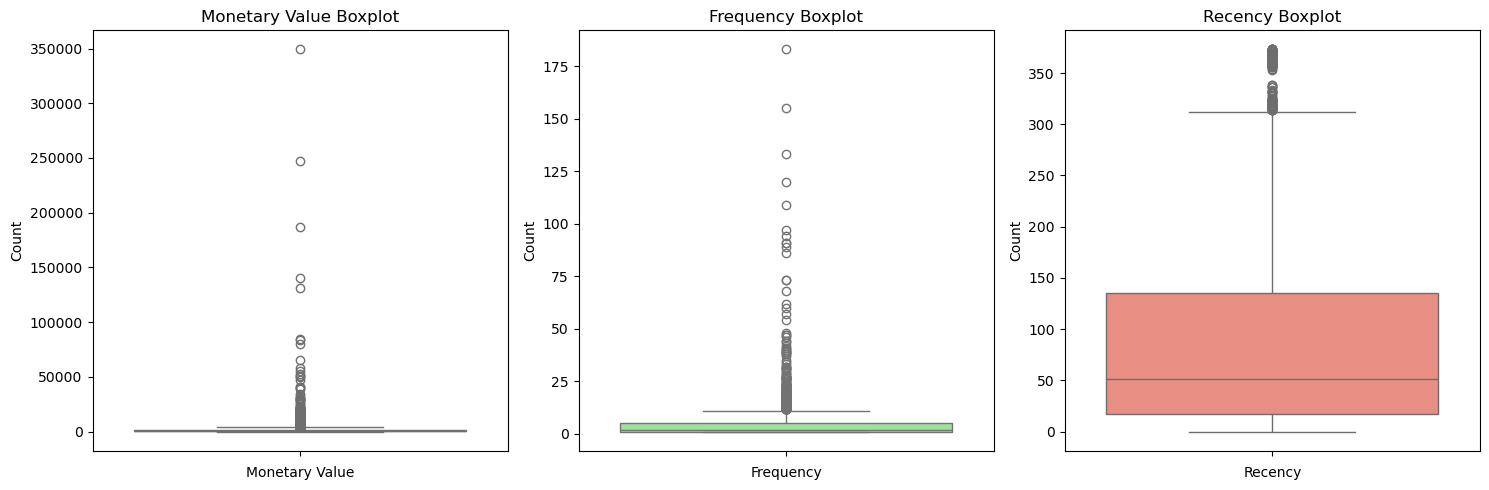

In [156]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(aggregated_df["MonetaryValue"], color= 'skyblue')
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.boxplot(aggregated_df["Frequency"], color = "lightgreen")
plt.title('Frequency Boxplot')
plt.xlabel("Frequency")
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_df["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Handling Outliers in RFM Analysis

Although we observe some outliers in the **Monetary Value**, **Frequency**, and **Recency** distributions, it's important to note that these outliers represent valuable data points that provide insights into specific customer behavior. For example:

- **High Monetary Values**: These customers might be making large purchases, which are critical for business strategies, such as loyalty programs or targeted marketing campaigns.
- **Frequent Purchases**: Customers with high frequency are highly engaged and can be valuable for retention efforts.
- **Recent Purchases**: Customers who recently made a purchase are more likely to be receptive to offers, and ignoring their data might result in missed opportunities.

Therefore, instead of removing these outliers, we should consider handling them appropriately, possibly by adjusting the analysis techniques or treating them as key segments for targeted strategies.


In [148]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3= aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [149]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3= aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


### Analyzing Outliers and Non-Outliers Separately

In [155]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


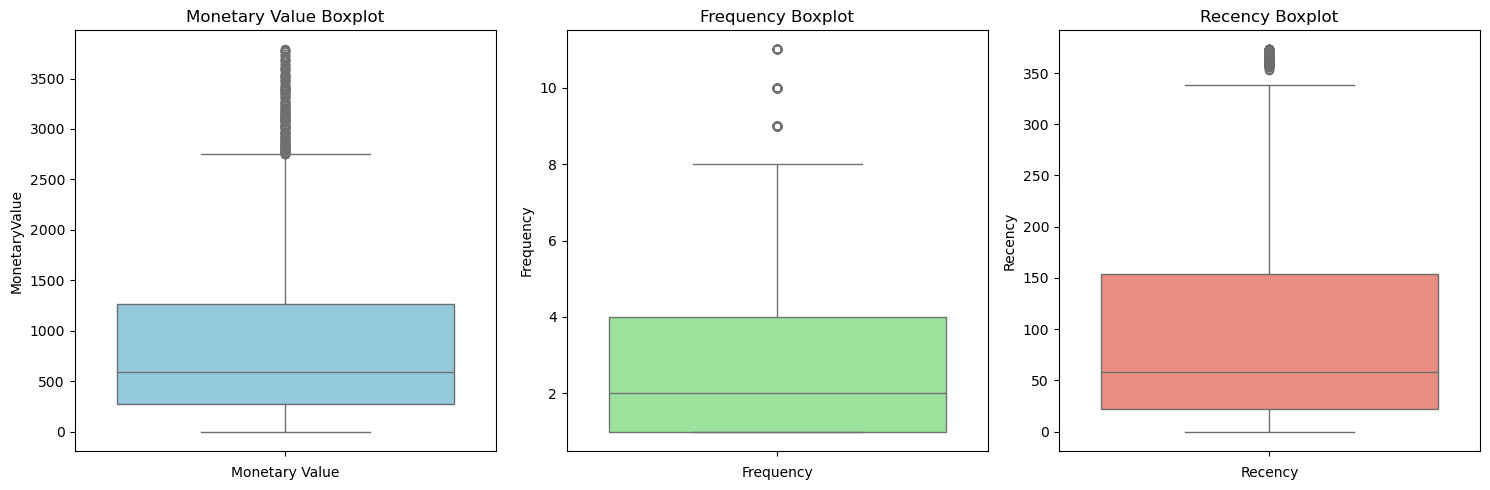

In [158]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(non_outliers_df["MonetaryValue"], color= 'skyblue')
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")


plt.subplot(1, 3, 2)
sns.boxplot(non_outliers_df["Frequency"], color = "lightgreen")
plt.title('Frequency Boxplot')
plt.xlabel("Frequency")


plt.subplot(1, 3, 3)
sns.boxplot(non_outliers_df["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")


plt.tight_layout()
plt.show()

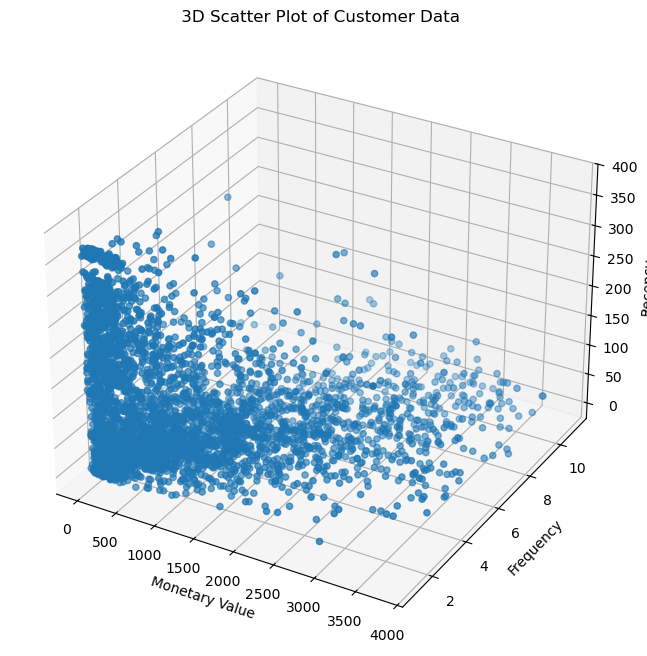

In [169]:
fig = plt.figure(figsize= (8, 8))

ax= fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title(" 3D Scatter Plot of Customer Data")

plt.show()

### Implementing Standard Scaling

To ensure each variable contributes equally to the analysis

In [164]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [177]:
scaled_data_df = pd.DataFrame(scaled_data, index= non_outliers_df.index, columns= ("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


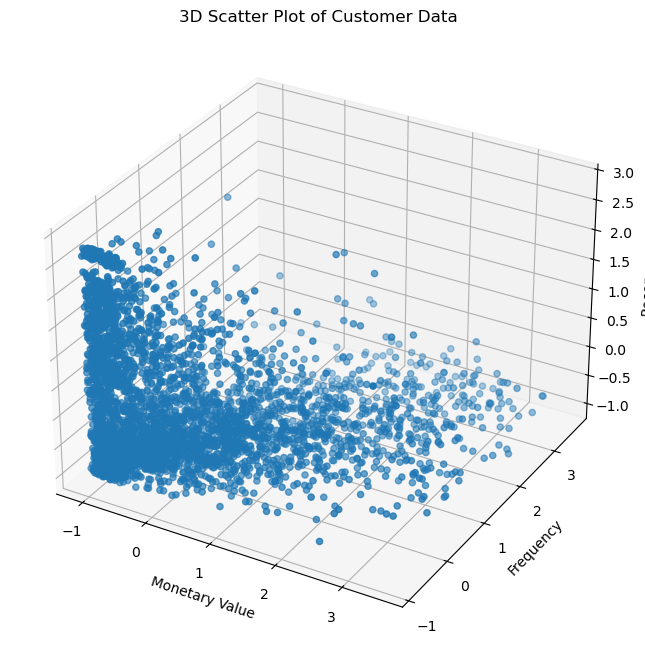

In [178]:
fig = plt.figure(figsize=(8, 8))

ax= fig.add_subplot(projection = "3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")

plt.show()

### K-Means Clustering
### Evaluating K-Means Clustering with Elbow and Silhouette Methods
In this section, we evaluate the optimal number of clusters (K) for the K-Means algorithm by using two common methods: the **Elbow Method** and the **Silhouette Score**.

1. **Elbow Method**: 
   We plot the inertia (sum of squared distances from each point to its assigned cluster center) for different values of K. The point where the inertia starts to level off is considered the optimal number of clusters.

2. **Silhouette Score**:
   This metric measures the quality of the clusters. A higher silhouette score indicates better-defined clusters. We calculate the silhouette score for each value of K and plot the results.

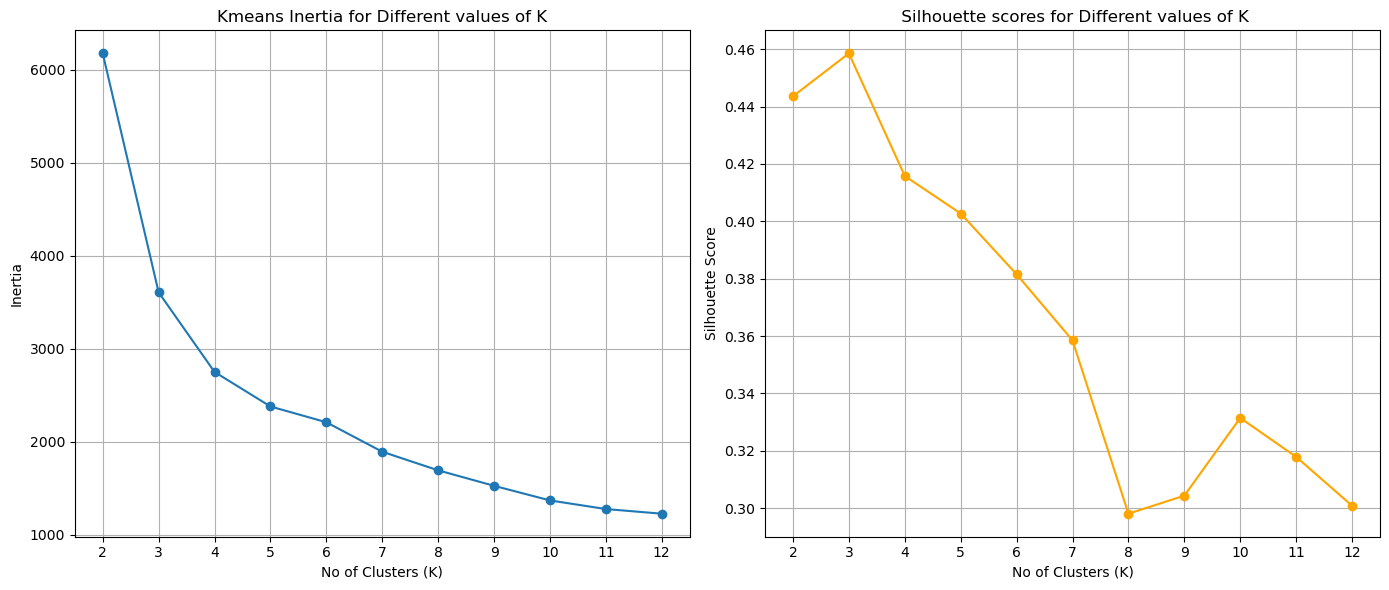

In [182]:
inertia = []

max_k = 12

silhouette_scores = []

k_values = range(2, max_k + 1)

for k in k_values:

    kmeans= KMeans(n_clusters = k, random_state = 42, max_iter = 100)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker = 'o')
plt.title("Kmeans Inertia for Different values of K")
plt.xlabel("No of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)



plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker = 'o', color = 'orange')
plt.title(" Silhouette scores for Different values of K")
plt.xlabel("No of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [183]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [184]:
non_outliers_df["Clusters"] = cluster_labels

non_outliers_df

/var/folders/r1/0b_sbly15f38jtv0x9y3gv2c0000gn/T/ipykernel_30890/2207634341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Clusters"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


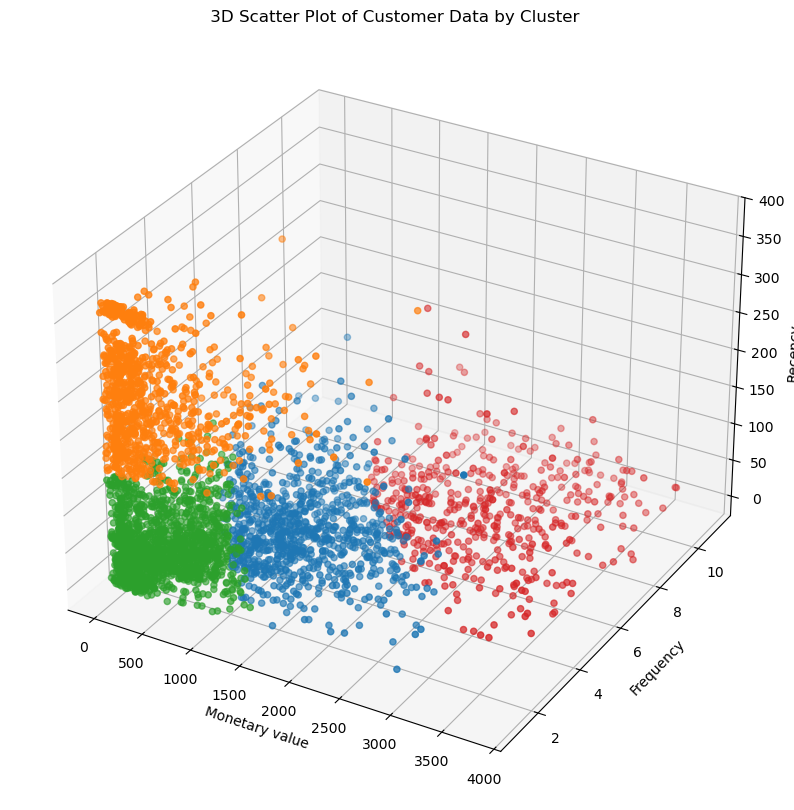

In [190]:
cluster_colors = { 0: "#1f77b4",  # Blue
                   1: "#ff7f0e",  # Orange
                   2: "#2ca02c",  # Green
                   3: "#d62728"}  # Red

colors = non_outliers_df["Clusters"].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))

ax= fig.add_subplot(projection= "3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"],
                     non_outliers_df["Frequency"],
                     non_outliers_df["Recency"],
                     c=colors, 
                     marker = "o" )

ax.set_xlabel("Monetary value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title(" 3D Scatter Plot of Customer Data by Cluster ")

plt.show()


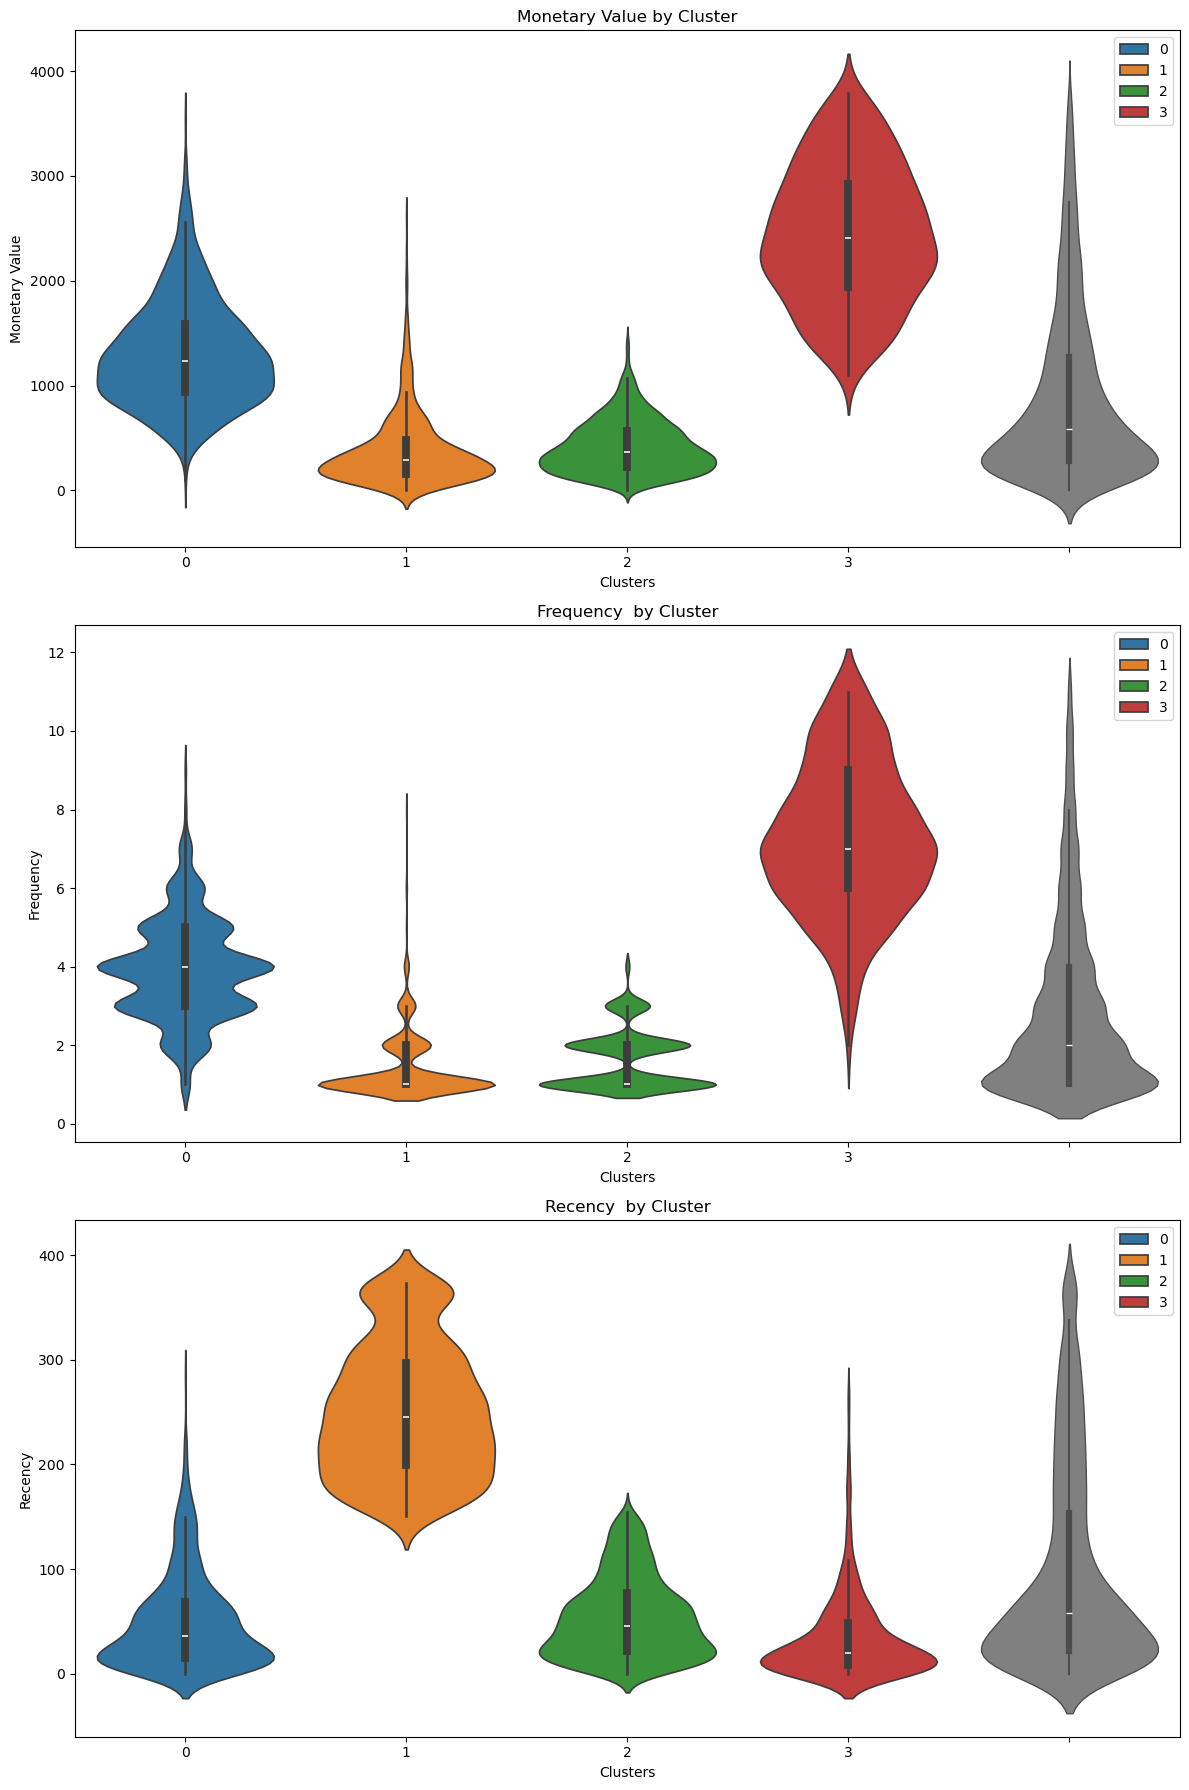

In [192]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df["Clusters"], y=non_outliers_df["MonetaryValue"], palette=cluster_colors, hue= non_outliers_df["Clusters"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color = 'gray', linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df["Clusters"], y=non_outliers_df["Frequency"], palette=cluster_colors, hue= non_outliers_df["Clusters"])
sns.violinplot(y=non_outliers_df['Frequency'], color = 'gray', linewidth=1.0)
plt.title("Frequency  by Cluster")
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df["Clusters"], y=non_outliers_df["Recency"], palette=cluster_colors, hue= non_outliers_df["Clusters"])
sns.violinplot(y=non_outliers_df['Recency'], color = 'gray', linewidth=1.0)
plt.title("Recency  by Cluster")
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster 0 (Blue): Regular Customers

•	Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
•	Action - (Retain): Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

Cluster 1 (Orange):  Churned Customers 

•	Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
•	Action - (Re-Engage): Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

Cluster 2 (Green): Occasional/New Shoppers

•	Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
•	Action - (Nurture): Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

Cluster 3 (Red): VIP/Loyal Customer

•	Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
•	Action - (Reward): Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.






In [200]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

overlap_indices

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Clusters"] = -1
frequency_only_outliers["Clusters"] = -2
monetary_and_frequency_outliers["Clusters"] = -3

outliers_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outliers_clusters_df[outliers_clusters_df["Clusters"] == -3]

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters
65,12437.00,6834.99,20,2010-11-09 14:46:00,30,-3
84,12471.00,17721.45,44,2010-11-30 14:35:00,9,-3
85,12472.00,10426.48,13,2010-12-05 14:19:00,4,-3
92,12482.00,21941.72,27,2010-05-12 16:51:00,211,-3
126,12540.00,7670.25,15,2010-11-26 10:43:00,13,-3
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


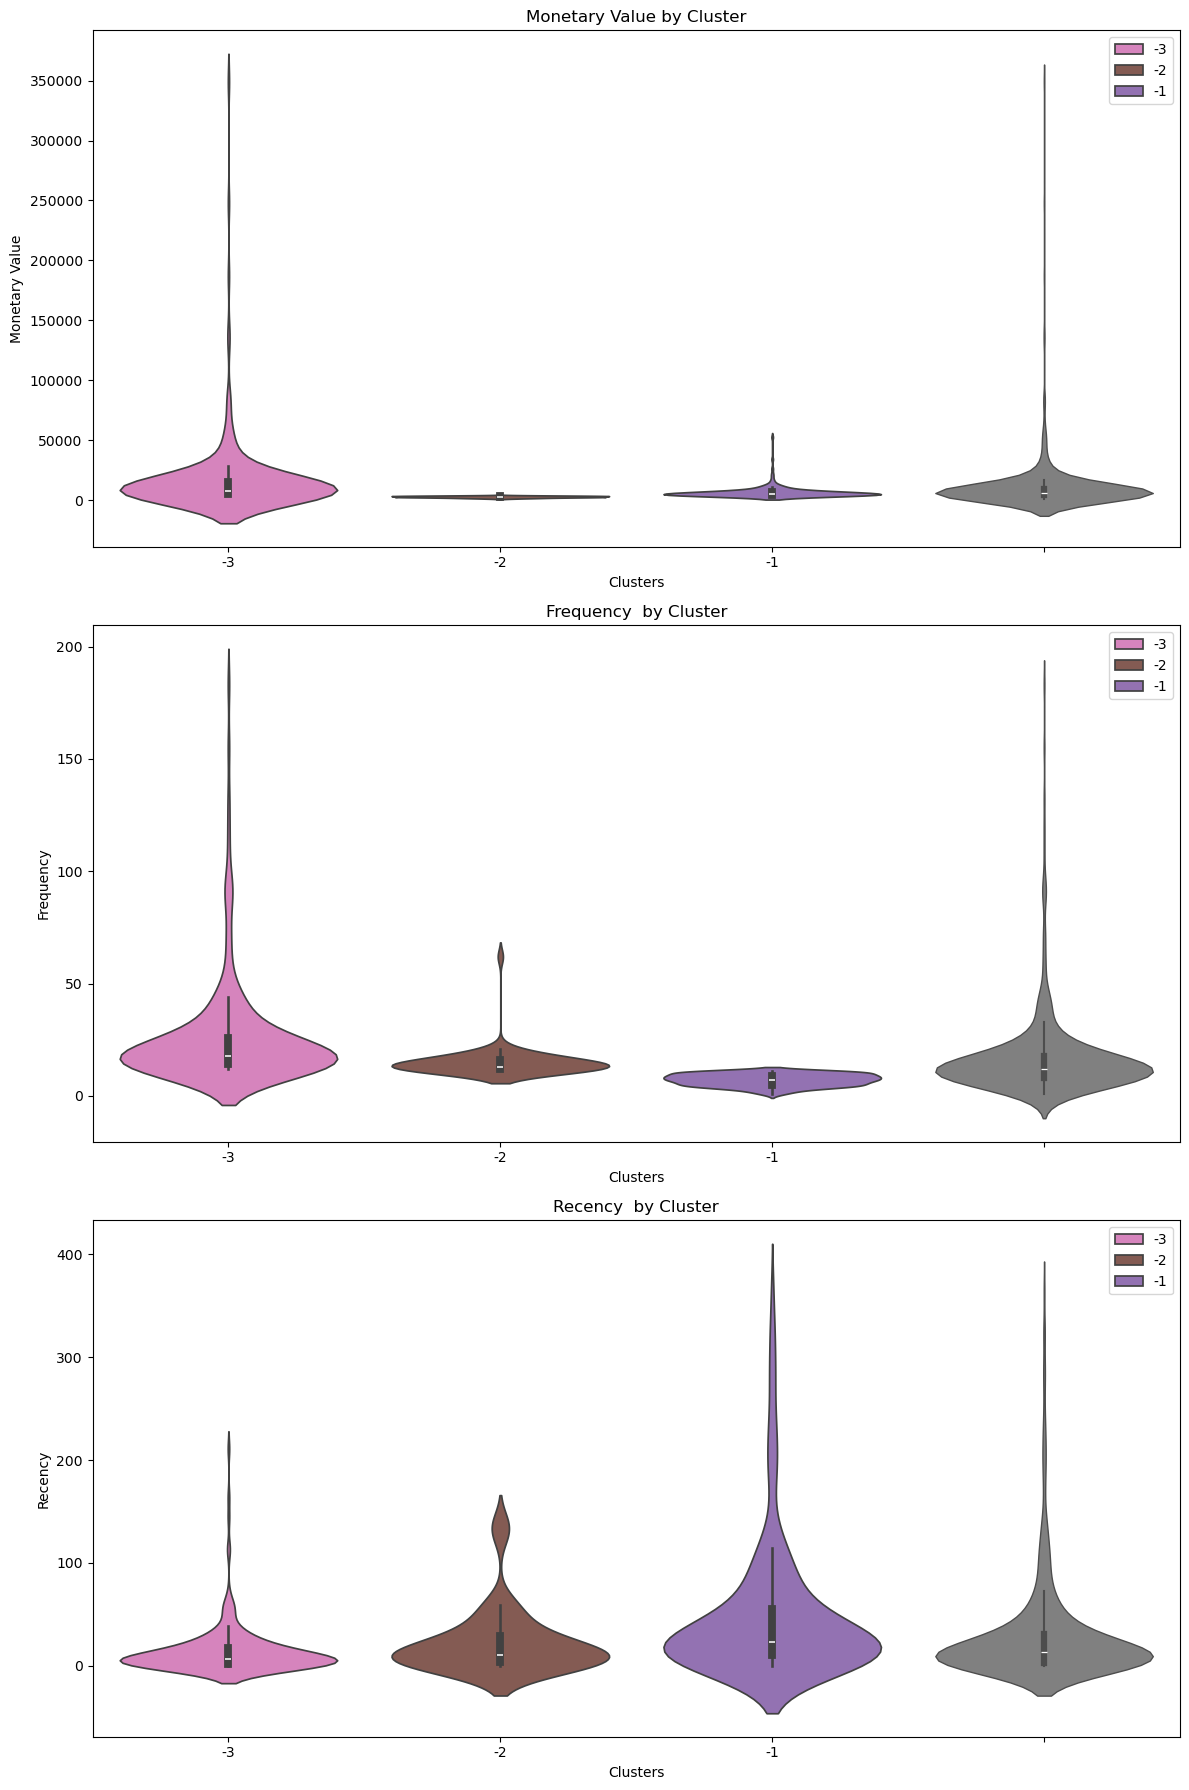

In [196]:

cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outliers_clusters_df["Clusters"], y=outliers_clusters_df["MonetaryValue"], palette=cluster_colors, hue= outliers_clusters_df["Clusters"])
sns.violinplot(y=outliers_clusters_df['MonetaryValue'], color = 'gray', linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outliers_clusters_df["Clusters"], y=outliers_clusters_df["Frequency"], palette=cluster_colors, hue= outliers_clusters_df["Clusters"])
sns.violinplot(y=outliers_clusters_df['Frequency'], color = 'gray', linewidth=1.0)
plt.title("Frequency  by Cluster")
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outliers_clusters_df["Clusters"], y=outliers_clusters_df["Recency"], palette=cluster_colors, hue= outliers_clusters_df["Clusters"])
sns.violinplot(y=outliers_clusters_df['Recency'], color = 'gray', linewidth=1.0)
plt.title("Recency  by Cluster")
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster -1 Luxury Buyers (Monetary Outliers): Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

Cluster -2 Frequent Shoppers (Frequency Outliers): Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

Cluster -3  Elite Patrons (Monetary & Frequency Outliers) DELIGHT: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [201]:
cluster_labels = {
    0: "Regular Customers",
    1: "Churned Customers",
    2: "Occasional/New Shoppers",
    3: "VIP/Loyal Customers",
    -1: "Luxury Buyers",
    -2: "Frequent Shoppers",
    -3: "Elite Patrons"
}

In [202]:
full_clustering_df = pd.concat([non_outliers_df, outliers_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [204]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Clusters"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,Churned Customers
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,Regular Customers
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,Occasional/New Shoppers
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,Regular Customers
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,Occasional/New Shoppers
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,Elite Patrons
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,Elite Patrons
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,Elite Patrons
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,Elite Patrons


### Visualization

In [205]:
cluster_counts = full_clustering_df["ClusterLabel"].value_counts()

cluster_counts

ClusterLabel
Occasional/New Shoppers    1499
Regular Customers           914
Churned Customers           902
VIP/Loyal Customers         494
Elite Patrons               226
Luxury Buyers               197
Frequent Shoppers            53
Name: count, dtype: int64

In [206]:
full_clustering_df["Monetary Value per 100 Pounds"] = full_clustering_df["MonetaryValue"] / 100.00

feature_means = full_clustering_df.groupby('ClusterLabel')[["Frequency", "Recency", "Monetary Value per 100 Pounds"]].mean()

feature_means

,Frequency,Recency,Monetary Value per 100 Pounds
ClusterLabel,,,
Churned Customers,1.43,251.17,3.85
Elite Patrons,25.87,14.45,171.48
Frequent Shoppers,15.04,23.08,27.35
Luxury Buyers,7.19,47.91,64.98
Occasional/New Shoppers,1.64,54.07,4.18
Regular Customers,3.91,49.73,13.09
VIP/Loyal Customers,7.24,33.89,24.36


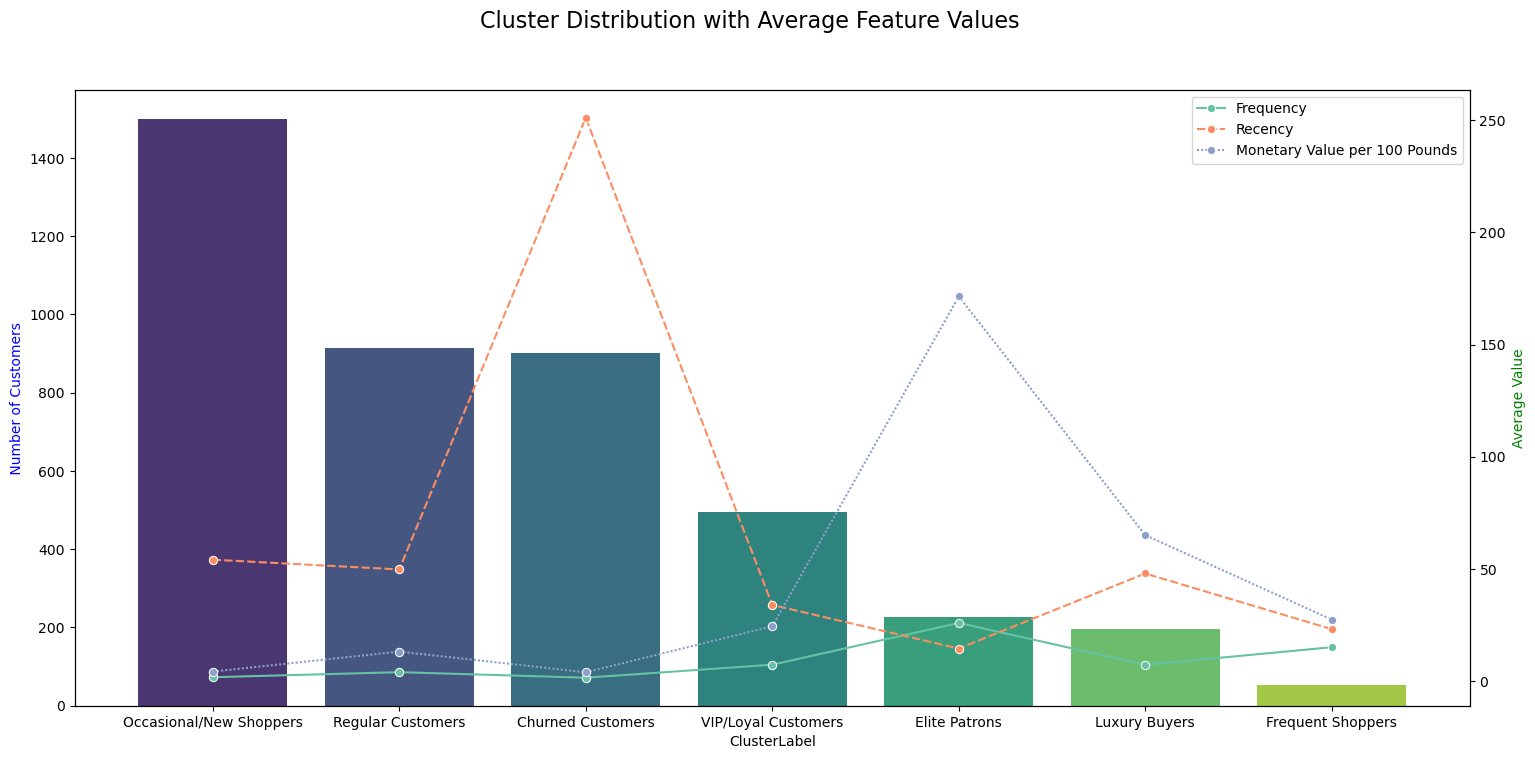

In [217]:
fig, ax1 = plt.subplots(figsize=(18,8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette= 'viridis', hue = cluster_counts.index)

ax1.set_ylabel(" Number of Customers ", color = 'b')
plt.suptitle("Cluster Distribution with Average Feature Values", fontsize= 16, color='black')

ax2= ax1.twinx()

sns.lineplot(data = feature_means, ax=ax2, palette = 'Set2', marker = 'o')
ax2.set_ylabel("Average Value", color= 'g')

plt.show()


